In [1]:
### Импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
### Вызываем файл
df_hr = pd.read_csv('HRDataset_v14.csv')

In [4]:
### Определяем функцию нормировки
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [5]:
### Определяем функцию подсчёта R^2
def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [6]:
### Производим разметку дополнительных фичей
temp_df = pd.DataFrame(df_hr[['RaceDesc', 'ManagerID']])
labelencoder = LabelEncoder()

df_hr['Race_id'] = labelencoder.fit_transform(temp_df['RaceDesc'])
df_hr['Manager_id'] = labelencoder.fit_transform(temp_df['ManagerID'])

In [7]:
### Строим регрессию
X = df_hr[['MaritalStatusID', 'PerfScoreID', 'SpecialProjectsCount',  'Race_id', 'PositionID', 'EmpSatisfaction', 'Manager_id']]
y = df_hr[['Salary']]
X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=90)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ -5243.51811149  10214.14384889  28027.53676779  -4954.65497711
   -4718.65224271   5659.19645978 -32505.53153367]]


In [8]:
### Измеряем её качество
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 21312.16620211823
R2 score is 0.28858986724436164
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 17048.97827372355
R2 score is 0.5157519343262065


# Результаты
В числе значимых для регрессии фичей были включены:
* Семейное положение
* Оценка производительности
* Количество проектов

В дополнение были выделены следующие фичи:
* Раса
* Позиция
* Удовлетворённость сотрудника
* Менеджер

Удаление любой из этих переменных приводит к ухудшению модели.



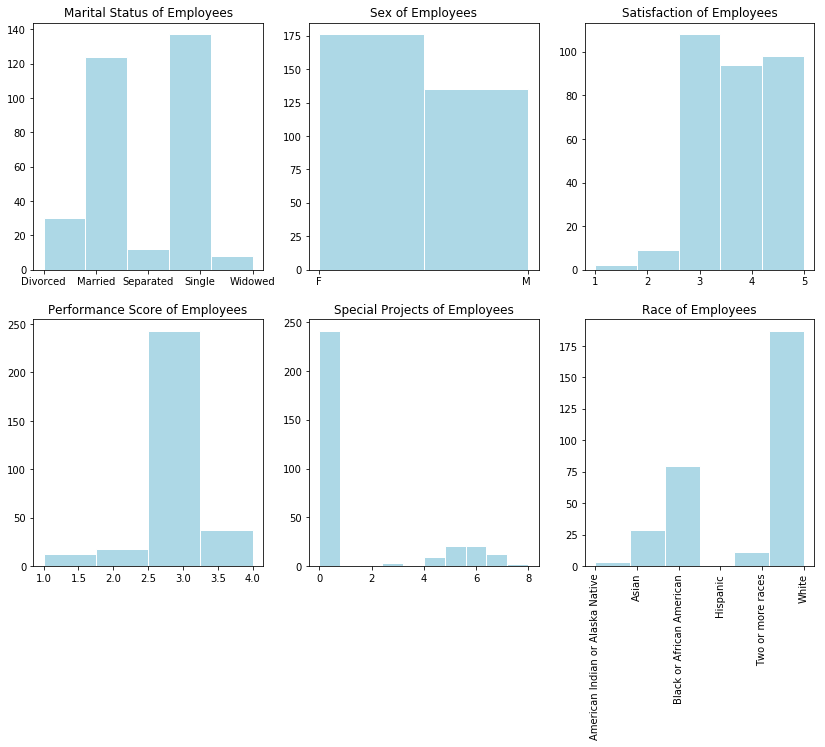

In [9]:
# Отображаем некоторые переменные
figure, axis = plt.subplots(2, 3)
axis[0, 0].hist(df_hr['MaritalDesc'], color = 'lightblue', edgecolor = 'white',
         bins = 5)
axis[0, 0].set_title("Marital Status of Employees")

axis[0, 1].hist(df_hr['Sex'], color = 'lightblue', edgecolor = 'white',
         bins = 2)
axis[0, 1].set_title("Sex of Employees")

axis[0, 2].hist(df_hr['EmpSatisfaction'], color = 'lightblue', edgecolor = 'white',
         bins = 5)
axis[0, 2].set_title("Satisfaction of Employees")

axis[1, 0].hist(df_hr['PerfScoreID'], color = 'lightblue', edgecolor = 'white',
         bins = 4)
axis[1, 0].set_title("Performance Score of Employees")

axis[1, 1].hist(df_hr['SpecialProjectsCount'], color = 'lightblue', edgecolor = 'white',
         bins = 10)
axis[1, 1].set_title("Special Projects of Employees")

axis[1, 2].hist(df_hr['RaceDesc'], color = 'lightblue', edgecolor = 'white',
         bins = 6)
axis[1, 2].set_title("Race of Employees")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

# Три самые значимые фичи:
## 1. Менеджер
Можно предположить, что у некоторых сотрудников с более высокой позицией либо нет менеджеров, либо более высокий уровень менеджера (см. следующий график)

## 2. Количество проектов
Так как большинство сотрудников не имеет проектов, можно предположить, что те, кто имеет  какие-то проекты, отличаются по заработной плате.

## 3. Оценка производительности
Так как большинство сотрудников имеет оценку производительности "3", то те, кто получает меньше или больше (не) получают премию, соответствующую их оценке.



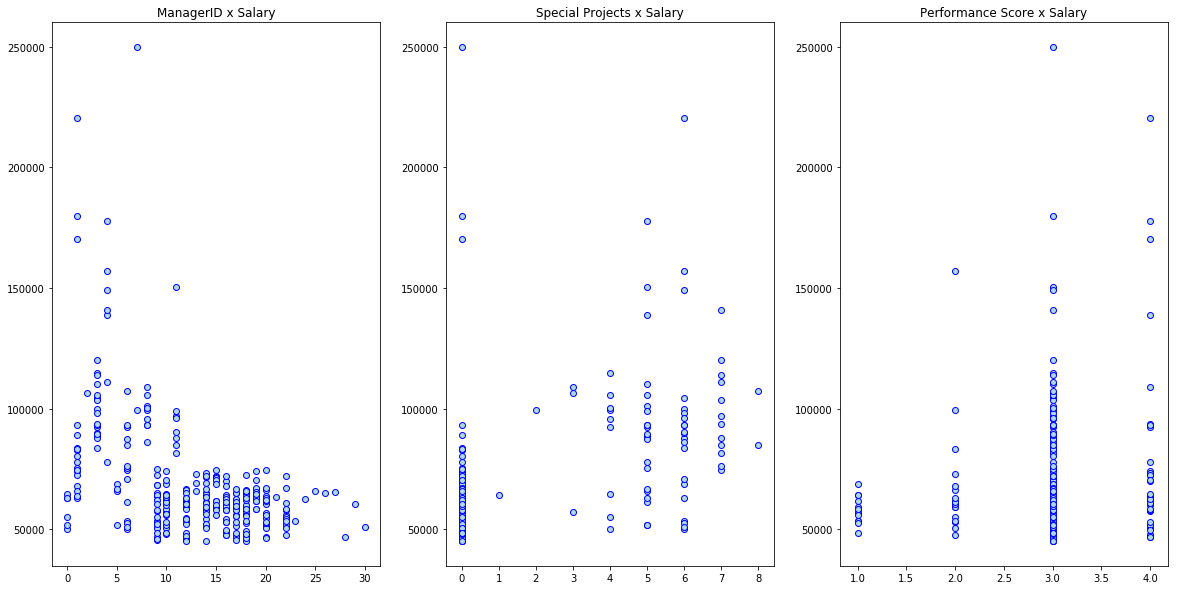

In [11]:
figure, axis = plt.subplots(1, 3)
axis[0].scatter(df_hr['Manager_id'], df_hr['Salary'], color = 'lightblue', edgecolor = 'blue')
axis[0].set_title("ManagerID x Salary")

axis[1].scatter(df_hr['SpecialProjectsCount'], df_hr['Salary'], color = 'lightblue', edgecolor = 'blue')
axis[1].set_title("Special Projects x Salary")

axis[2].scatter(df_hr['PerfScoreID'], df_hr['Salary'], color = 'lightblue', edgecolor = 'blue')
axis[2].set_title("Performance Score x Salary")

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()